In [3]:
import spacy
import re
import json
from collections import Counter
import locale
from scipy.stats import rankdata
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr, spearmanr, linregress, logistic
import nltk
import pandas as pd
import matplotlib.pyplot as plt

nlp = spacy.load('en')
ps = nltk.stem.PorterStemmer()

In [6]:
with open('walden.txt') as f:
    text = f.readlines()
    
text = re.sub(r'(\W[-—]|\n)', ' ', ''.join(text))
docs = nlp(text)
words = [ps.stem(tok.lemma_.lower()) for tok in docs if re.fullmatch(r'[A-Za-z\-\']+', tok.lemma_)]

In [7]:
len(set(words))

6879

In [62]:
len(word_levels_df)

3979831

In [26]:
word_levels_df = word_levels

In [30]:
word_levels = json.load(open('word-levels.json'))

In [40]:
def simulate(ability, words, levels, mistake=0.001, guess=0.5):
    lookup = []
    seen = Counter()
    known = set()
    lookedup = set()
    for word in words:
        if word not in levels:
            continue
        if random.random() < mistake:
            lookup.append(word)
        else:
            if word not in seen:
                p = 1/(1 + np.exp(levels[word]-ability))
                if random.random() < p:
                    known.add(word)
            if word not in known and word not in lookedup:
                if random.random() >= np.power(guess, seen[word]+1):
                    lookup.append(word)
                    lookedup.add(word)
        seen[word] += 1
    return lookup

In [41]:
lookups = [simulate(i, words, word_levels) for i in range(16)]

In [42]:
[(len(l), avg_level(word_levels, l)) for l in lookups]

[(5311, 4.951609866315195),
 (5099, 5.044714649931359),
 (4716, 5.241942324003393),
 (4214, 5.440199335548173),
 (3477, 5.725625539257981),
 (2719, 6.00331004045605),
 (1940, 6.280927835051546),
 (1259, 6.652899126290707),
 (775, 7.030967741935484),
 (429, 6.934731934731935),
 (292, 6.7979452054794525),
 (200, 6.04),
 (174, 5.655172413793103),
 (115, 4.095652173913043),
 (100, 2.74),
 (114, 2.43859649122807)]

In [32]:
def avg_level(words_levels, lookup):
    return np.nanmean(np.vectorize(word_levels.get)(lookup))

In [56]:
def sim(guess):
    abilities = np.repeat(np.arange(16),100)
    lookups = [simulate(a, words, word_levels, mistake=0.001, guess=guess) for a in abilities]

    avg_levels =np.array([avg_level(word_levels, l) for l in lookups])
    print(pearsonr(abilities, avg_levels))

    plt.boxplot(avg_levels.reshape(16, 100).T)
    plt.xlabel('ability')
    plt.ylabel('average level of looked up words')
    plt.title(guess)
    plt.show()

(-0.24066978654362065, 1.6209766153027236e-22)


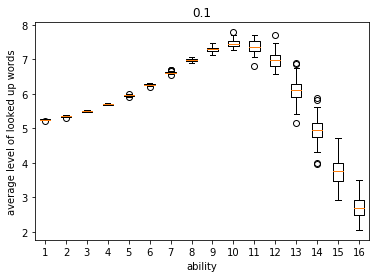

In [57]:
sim(0.1)

(-0.24916443779521527, 4.560178196799329e-24)


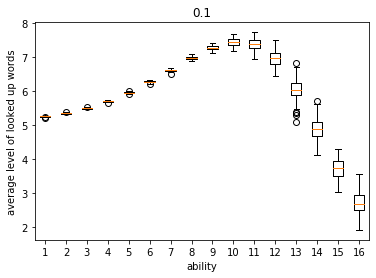

(-0.28252593734223475, 9.549228110746399e-31)


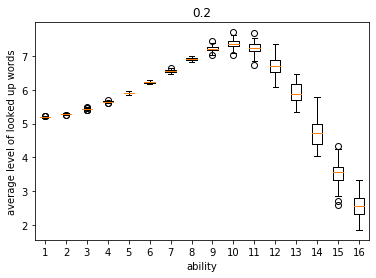

(-0.33109654723499543, 3.067428534614629e-42)


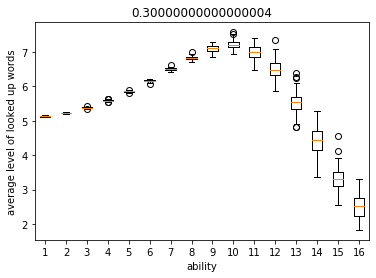

(-0.3782008595039579, 1.4384485498455848e-55)


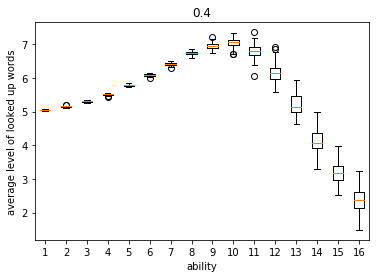

(-0.4250661619441109, 3.3057531139502783e-71)


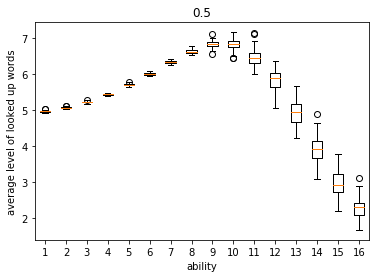

(-0.47819567368448856, 3.342024387551549e-92)


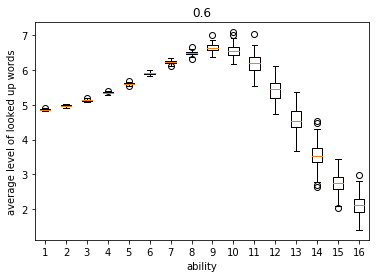

(-0.5504083339106903, 2.1231918527493378e-127)


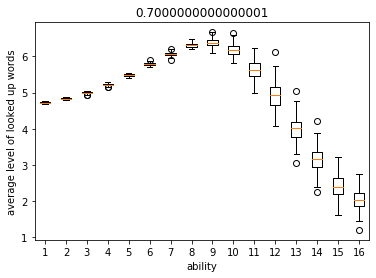

(-0.6228442839407516, 1.433887026643596e-172)


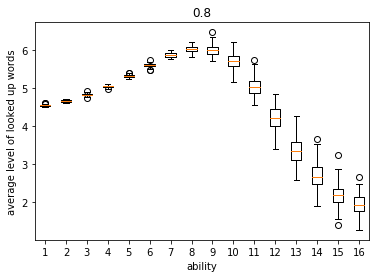

(-0.7152521852073315, 6.1274863771850485e-251)


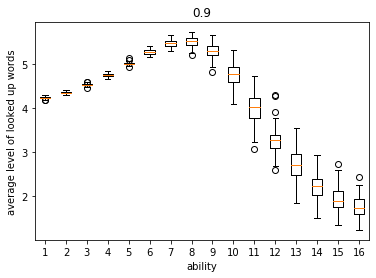

[None, None, None, None, None, None, None, None, None]

In [61]:
[sim(i) for i in np.arange(0.1, 1, 0.1)]